# Data and Setup


**Import Numpy and pandas**

In [2]:
import numpy as np
import pandas as pd

**Import Visualization libraries and set %matplotlib inline**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as the dataframe called df**

In [5]:
df = pd.read_csv('911.csv')

**Check the info of the df**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652692 entries, 0 to 652691
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        652692 non-null  float64
 1   lng        652692 non-null  float64
 2   desc       652692 non-null  object 
 3   zip        573727 non-null  float64
 4   title      652692 non-null  object 
 5   timeStamp  652692 non-null  object 
 6   twp        652409 non-null  object 
 7   addr       652692 non-null  object 
 8   e          652692 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 32.4+ MB


**Check the head of the df**

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [8]:
df['zip'].value_counts().head(5)

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

**What are the top 5 townships(twp) for 911 calls?**

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    54686
ABINGTON        39302
NORRISTOWN      36931
UPPER MERION    35412
CHELTENHAM      30044
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [16]:
df['title'].nunique()

148

# Creating new features

   **In the titles columns there are 'Reasons/Department' specified before the title code. These are EMS, fire,and Traffic. Use apply() with the custom lambda expression to create a new column which the new column 'Reason' that contains these string values.**
   
**For example, if the titles contains EMS: back pain, reason column would be EMS**

In [21]:
x = df['title'].iloc[0]

In [24]:
x.split(':')[0]

'EMS'

In [25]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [26]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

**What are the most common reason for 911 call based off of this new columns?**

In [27]:
df['Reason'].value_counts()

EMS        326850
Traffic    227045
Fire        98797
Name: Reason, dtype: int64

**Now use Seaborn's countplot of 911 calls by Reason**

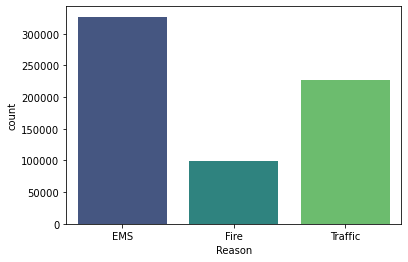

In [30]:
sns.countplot(x='Reason',data= df,palette = 'viridis')

**Now focus on Time information. What are the data types of the objects in the timeStamp column**

In [32]:
type(df['timeStamp'].iloc[0])

str

**Now use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)  to convert the column from string to DataTime object**

In [39]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [40]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Now we can now grab specific attribute from the Dataframe object by calling them. For example:

In [44]:
time = df['timeStamp'].iloc[0]

In [54]:
time.hour

17

**Now we create four new columns to contain Hour, Month, Day and Year**

In [77]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)

In [78]:
df['Month'] = df['timeStamp'].apply(lambda time : time.month)

In [79]:
df['Day of week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [80]:
df['Year'] = df['timeStamp'].apply(lambda time : time.year)

In [90]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,10,3


**Notice that the Day of week is in integer [0-6]. Use the map() with this dictionary to map the integer with actual string names to the day of the week**

In [93]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}

In [94]:
df['Day of week'] = df['Day of week'].map(dmap)

In [96]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,Thr
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,Thr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10,Thr
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10,Thr
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,10,Thr


**Now use the Seaborn to create a count plot of the Day of week column with hue based off of the Reason column**

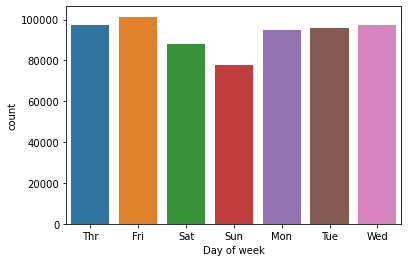

In [100]:
sns.countplot(x = 'Day of week',data = df)

**Shows bit of the drop on Sunday**

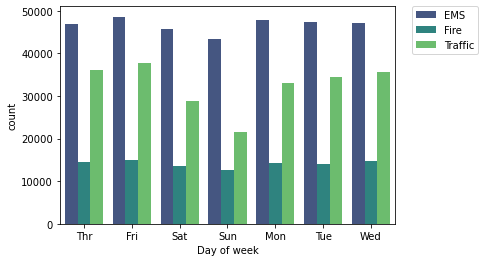

In [105]:
sns.countplot(x = 'Day of week',data = df, hue ='Reason',palette = 'viridis')
#To show legend on the outside.
plt.legend(bbox_to_anchor =(1.05,1), loc =2, borderaxespad=0. )

**Same analysis with Month column**

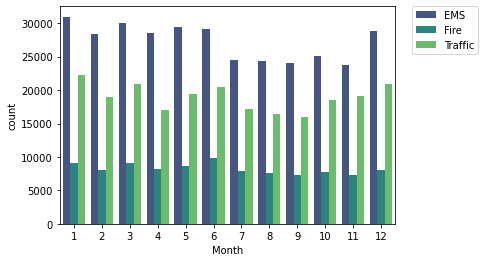

In [106]:
sns.countplot(x = 'Month',data = df, hue ='Reason',palette = 'viridis')
#To show legend on the outside.
plt.legend(bbox_to_anchor =(1.05,1), loc =2, borderaxespad=0. )

**Creating a groupby object byMonth, where we are grouping the Data by the month column and use the count() for aggregation. Use the head() method on this returned Dataframe**

In [119]:
byMonth = df.groupby('Month').count()

In [120]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Day of week
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509
6,59465,59465,59465,52099,59465,59465,59437,59465,59465,59465,59465,59465,59465
7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571,49571
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213


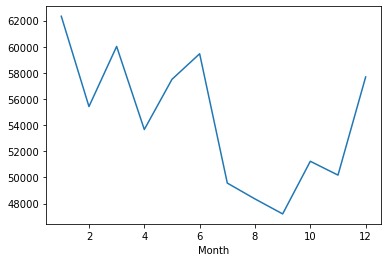

In [122]:
byMonth['Day'].plot()

**Now lets use Seaborn's lmplot() to create a linear fit to the number of calls per month.**

In [ ]:
byMonth.reset_index()

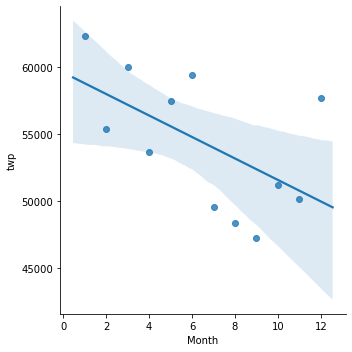

In [124]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a Date column which contains date from the timeStamp column**

In [134]:
df['Date'] = df['timeStamp'].apply(lambda time : time.date())

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,Thr,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,Thr,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10,Thr,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10,Thr,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,10,Thr,2015-12-10


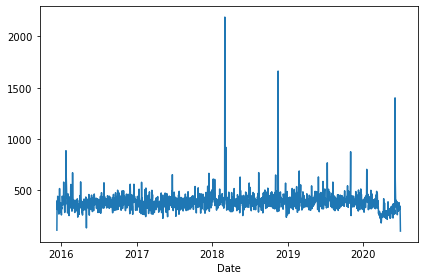

In [144]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

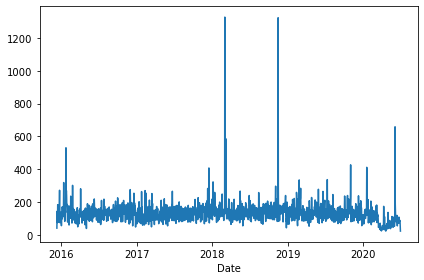

In [148]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

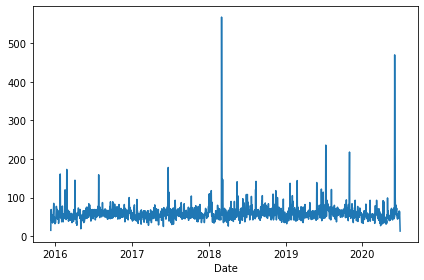

In [149]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

**Creating Heatmaps with Seaborn. But first restructure the dataframe columns becomes hours and index becomes Day of week. We will get this with groupby with an [unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) method.**

In [173]:
day_hour = df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()

**Now create a Heatmap using this dataframe**

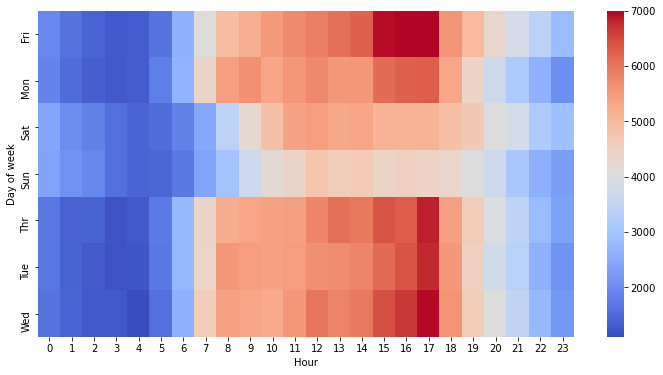

In [178]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap = 'coolwarm')

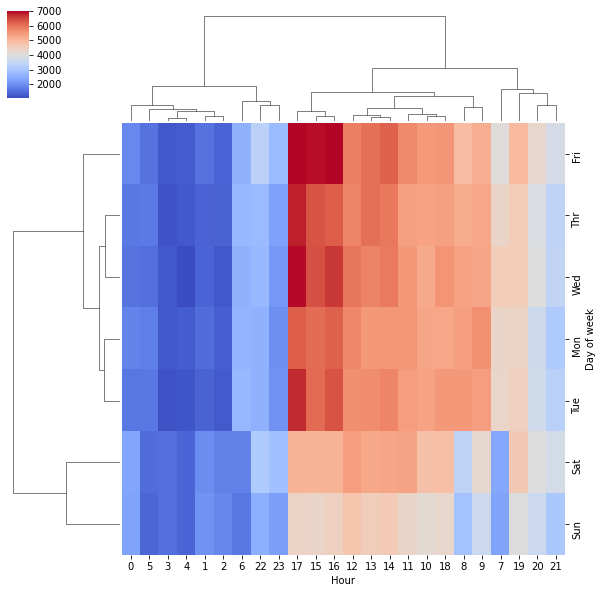

In [179]:
sns.clustermap(day_hour,cmap = 'coolwarm')

In [175]:
day_Month = df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()

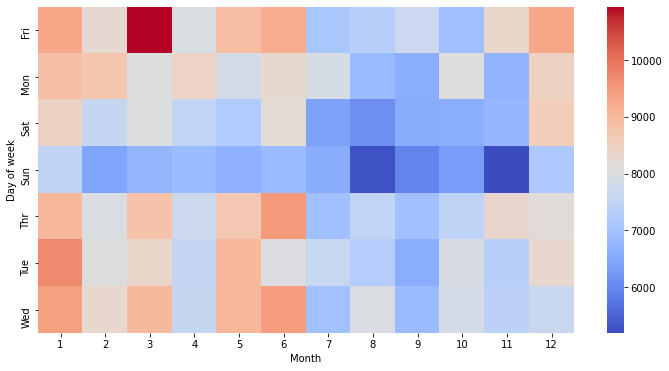

In [176]:
plt.figure(figsize=(12,6))
sns.heatmap(day_Month,cmap = 'coolwarm')

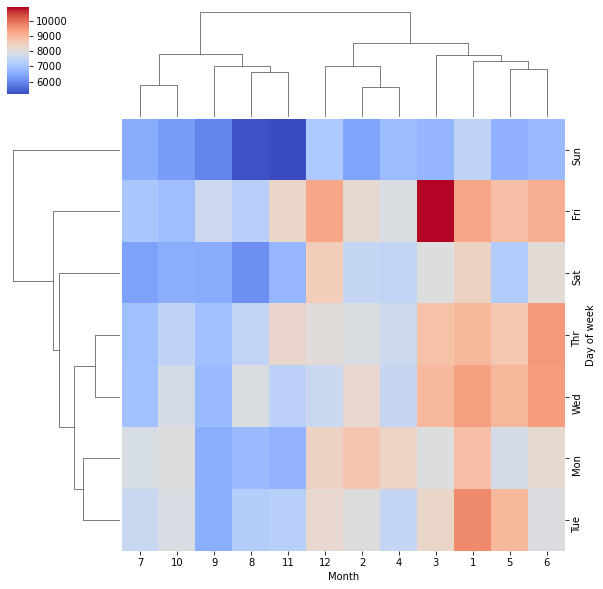

In [177]:
sns.clustermap(day_Month,cmap = 'coolwarm')